<a href="https://colab.research.google.com/github/Vixuz144/Simulaci-n-2/blob/main/Inventario_MC.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Prueba de Lognormalidad**

Primero, hay que corroborar que los datos de los inventarios (compras y ventas) siguen una distribución lognormal.

In [1]:
import matplotlib.pyplot as plt
from scipy.stats import norm, chisquare, chi2
import pandas as pd
import numpy as np

[217341 180666 188350 206181 194628 166424 263752 257421 188314 315385
 232450 158549 189944 218268 135645 244894 145878 129865 228334 184586
 301810 248357 205626 299215 224218 199077 207464 238289 232267 310728
 293377 278447 238712 354363 314256 241572] 

 [160160 167038 153426 133929 154207 156110 216367 251471 155565 271941
 198182 138704 148050 180390 95380 139560 96792 84655 153977 130960 260795
 188139 139549 135551 169929 145810 122936 195912 193320 263416 231514
 212191 161640 252197 251906 150487]


(array([ 5.,  7., 12.,  5.,  6.,  1.]),
 array([129865.        , 167281.33333333, 204697.66666667, 242114.        ,
        279530.33333333, 316946.66666667, 354363.        ]),
 <BarContainer object of 6 artists>)

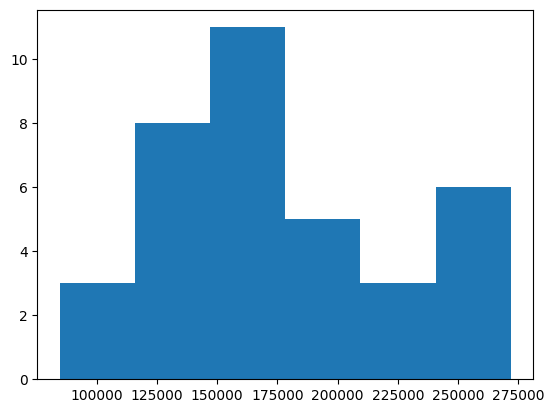

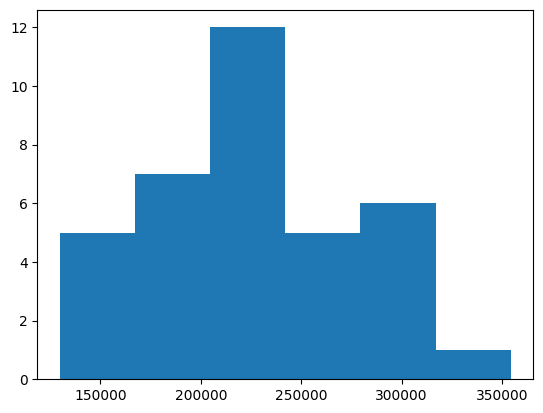

In [2]:
datos  = pd.read_excel("Datos Modelo Inventarios.xlsx")
datos = datos.to_numpy()
# print(datos)

compras = datos[1:, 1::2].flatten()
ventas = datos[1:, 2::2].flatten()
print(compras, "\n\n" ,ventas)

plt.hist(ventas, bins = 6)

plt.figure()
plt.hist(compras, bins = 6)

Como se puede ver en las gráficas anteriores, podríamos decir que ambos conjuntos datos siguen una distribución lognormal.

Como hubo algunos contratiempos con la distribución lognormal se hará uso del hecho que la relación con la distribución normal.

Note que:

$$ X ∼ N(μ_x, σ_x) $$

si $ Y = e^{X}  $, entonces

$$ Y ∼ LogN(μ_y, σ_y) $$

Ahora, en lugar de tomar los datos originales se tomarrá el logaritmo de los datos.

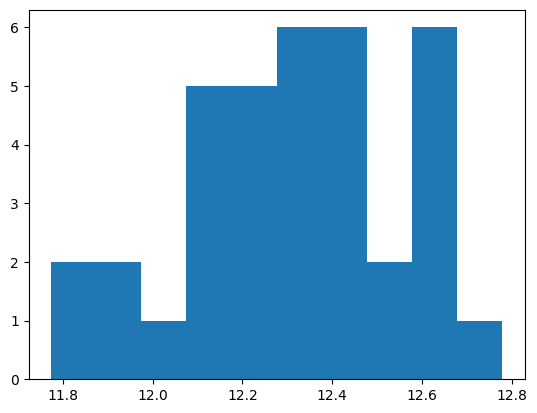

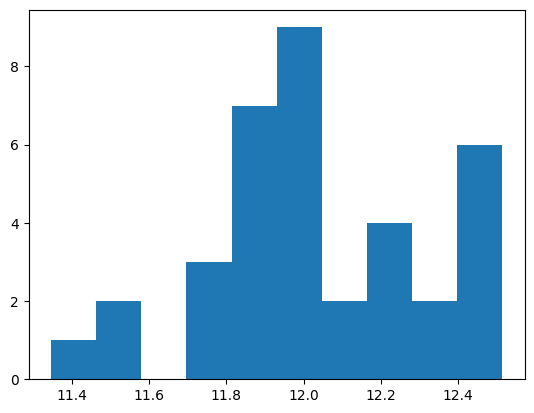

In [3]:
logv = list()
logc = list()
for i in ventas:
  logv.append(np.log(i))

for i in compras:
  logc.append(np.log(i))

plt.hist(logc)

plt.figure()
plt.hist(logv)

plt.show()

In [4]:
def frecuencias(data, m = 5):
  d = np.array(data)
  n = len(data)

  a = np.floor(np.min(d))
  b = np.ceil(np.max(d))
  p = (b-a)/m

  o, l = [], [a]
  for i in range(m):
    l.append(l[i] + p)
    o.append(list((d>=l[i]) == (d<l[i+1])).count(True))

  if len(data) > sum(o):
    o[-1] += len(data) - sum(o)

  return l, np.array(o)

In [5]:
def p_chi2(f_obs, f_esp, alpha_1 = 0.95):
  f1 = np.array(f_obs)
  f2 = np.array(f_esp)

  m = len(f1)

  dif = f1 - f2

  chi_est_p = sum(dif**2/f2)

  chi_crit = chi2.ppf(alpha_1, m-1)

  if chi_est_p < chi_crit:
    mensaje = "No rechazo, las distros parecen ser idénticas"
  else:
    mensaje = "Rechazo, distros no son iguales"

  return chi_est_p, chi_crit, mensaje

In [6]:
med_c = np.mean(logc)
med_v = np.mean(logv)
desv_c = np.std(logc, ddof = 1)
desv_v = np.std(logv, ddof = 1)

print(f"Valor medio de los logaritmos de las compras: {med_c}")
print(f"Desviasió estandar de los logaritmos de las compras: {desv_c}\n")

print(f"Valor medio de los logaritmos de las ventas: {med_v}")
print(f"Desviasió estandar de los logaritmos de las ventas: {desv_v}")

Valor medio de los logaritmos de las compras: 12.31197097048965
Desviasió estandar de los logaritmos de las compras: 0.2442542974909337

Valor medio de los logaritmos de las ventas: 12.026048499145169
Desviasió estandar de los logaritmos de las ventas: 0.29138079715750087


In [7]:
iv, fv = frecuencias(logv, 10)
ic, fc = frecuencias(logc, 10)
n = len(ventas)
m = len(fv)

#print(ic)
#print(iv)


c = n * norm(med_c, desv_c).cdf(ic)[1:]
v = n * norm(med_v, desv_v).cdf(iv)[1:]
rc, rv = [c[0]], [v[0]]
for i in range(1,m):
  rc.append(c[i] - c[i-1])
  rv.append(v[i] - v[i-1])

# print(sum(rc))
#print(rv)

#print(fv)
# print(sum(fc))


# print(chisquare(fv, rv))
print(p_chi2(fv, rv))

# print(chisquare(fc, rc))
print(p_chi2(fc, rc))

(14.180365209507746, 16.918977604620448, 'No rechazo, las distros parecen ser idénticas')
(4.098066296777522, 16.918977604620448, 'No rechazo, las distros parecen ser idénticas')


Como se puede observar en los resultados anteriores, la distribución de los logaritmos siguen una distribución normal. Por ende, los datos originales tienen distribución lognormal


**PASO 1**. Defina las variables que intervienen en el modelo.

$$ log(C) ∼ N(\mu = 12.31197, \sigma = 0.24425) $$
$$ log(V) ∼ N(\mu = 12.02605, \sigma = 0.29138) $$



**PASO 2**. Formule la distribución de probabilidad de cada variable.


|    |**C**|**V**|
|----|-----|-----|
|f(x)|$$\frac{1}{σ\sqrt{2\pi}} e^{-\frac{(x-\mu)^2}{2σ^2}}$$|$$\frac{1}{σ\sqrt{2\pi}} e^{-\frac{(x-\mu)^2}{2σ^2}}$$|

**PASO 3**. Enumere la distribución acumulada de probabilidad de cada variable.

|    |**C**|**V**|
|----|-----|-----|
|f(x)|$$\frac{1}{σ\sqrt{2\pi}} e^{-\frac{(x-\mu)^2}{2σ^2}}$$|$$\frac{1}{σ\sqrt{2\pi}} e^{-\frac{(x-\mu)^2}{2σ^2}}$$|
|F(x)|$$\frac{1}{2} \left[ 1 + erf\left( \frac{x - μ}{σ\sqrt2} \right)\right]$$|$$\frac{1}{2} \left[ 1 + erf\left( \frac{x - μ}{σ\sqrt2} \right)\right]$$|

**PASO 4**. Establezca el intervalo de números aleatorios correspondiente a cada valor de cada una de las variables.

|    |**C**|**V**|
|----|-----|-----|
|f(x)|$$\frac{1}{σ\sqrt{2\pi}} e^{-\frac{(x-\mu)^2}{2σ^2}}$$|$$\frac{1}{σ\sqrt{2\pi}} e^{-\frac{(x-\mu)^2}{2σ^2}}$$|
|F(x)|$$\frac{1}{2} \left[ 1 + erf\left( \frac{x - μ}{σ\sqrt2} \right)\right]$$|$$\frac{1}{2} \left[ 1 + erf\left( \frac{x - μ}{σ\sqrt2} \right)\right]$$|
|**Intervalos**|$$(-∞,∞)$$|$$(-∞,∞)$$|

**PASO 5**. Genere números aleatorios.

In [8]:
c = norm(med_c, desv_c)
v = norm(med_v, desv_v)

ec = np.exp(c.rvs())
ev = np.exp(v.rvs())

print(ec,ev)

295021.1081128362 222177.22511485347
